# 🍃 Verdant: Classificação multi-classe de fitopatologias usando CNNs

**Verdant** é um protótipo de aplicativo móvel para diagnóstico de fitopatologias (doenças e pragas em plantas), desenvolvido por Matheus Ritton em 2025 como parte do Trabalho de Conclusão do curso de Sistemas de Informação da Universidade Federal Rural do Rio de Janeiro (UFRRJ).

### 💻 Sobre este notebook

Este notebook de cunho acadêmico foi criado para realizar testes entre diferentes modelos de CNNs, de forma a estudar e discutir suas performances para um problema de classificação de imagens. Foi utilizado como base o dataset **[PlantVillage](https://arxiv.org/abs/1511.08060)**.

Dataset utilizado: https://data.mendeley.com/datasets/tywbtsjrjv/1

### 💬 O que será discutido aqui?
O notebook é dividido por seções baseadas em diferentes modelos que foram usados como testes para resolver um problema de classificação multi-classe.

* No início de cada seção dos modelos haverá uma breve apresentação sobre.
* Será apresentado o script de forma lógica, ajustes feitos (caso haja) e gráficos de performance.
* Ao final, com base nos dados coletados, será mostrado qual foi o modelo escolhido para a API do Verdant.

### 📓 Requisitos necessários:
* **Noção básica de Python e TensorFlow** - para entendimento da lógica de programação;
* **Noção básica de conceitos como Aprendizado Profundo (Deep Learning) e Redes Neurais Convolucionais (CNNs)** - para compreensão sobre a arquitetura e lógica dos modelos;

## 📚 Download do dataset


In [ ]:
# Bibliotecas necessárias
import tensorflow as tf
import zipfile
import os
import shutil
import pathlib
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns
import cv2

# Específicas do TensorFlow Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Específicas para Métricas
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [ ]:
# Checando a versão do TensorFlow
print(tf.__version__)

2.18.0


In [ ]:
# Download do dataset
!wget https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/b4e3a32f-c0bd-4060-81e9-6144231f2520/file_downloaded

# Descompactar o arquivo
zip_ref = zipfile.ZipFile("file_downloaded")
zip_ref.extractall()
zip_ref.close()

--2025-05-07 17:58:57--  https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/b4e3a32f-c0bd-4060-81e9-6144231f2520/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.130.86, 162.159.133.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.130.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/349ac012-2948-4172-bbba-3bf8f76596fd [following]
--2025-05-07 17:58:58--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/349ac012-2948-4172-bbba-3bf8f76596fd
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 3.5.66.104, 3.5.70.35, 3.5.72.186, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|3.5.66.104|:443... conne

In [ ]:
dataset_path = pathlib.Path("Plant_leave_diseases_dataset_with_augmentation/")

## 🔎 Inspecionando o dataset

In [ ]:
# Diretórios
!ls Plant_leave_diseases_dataset_with_augmentation/

 Apple___Apple_scab
 Apple___Black_rot
 Apple___Cedar_apple_rust
 Apple___healthy
 Background_without_leaves
 Blueberry___healthy
 Cherry___healthy
 Cherry___Powdery_mildew
'Corn___Cercospora_leaf_spot Gray_leaf_spot'
 Corn___Common_rust
 Corn___healthy
 Corn___Northern_Leaf_Blight
 Grape___Black_rot
'Grape___Esca_(Black_Measles)'
 Grape___healthy
'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
'Orange___Haunglongbing_(Citrus_greening)'
 Peach___Bacterial_spot
 Peach___healthy
 Pepper,_bell___Bacterial_spot
 Pepper,_bell___healthy
 Potato___Early_blight
 Potato___healthy
 Potato___Late_blight
 Raspberry___healthy
 Soybean___healthy
 Squash___Powdery_mildew
 Strawberry___healthy
 Strawberry___Leaf_scorch
 Tomato___Bacterial_spot
 Tomato___Early_blight
 Tomato___healthy
 Tomato___Late_blight
 Tomato___Leaf_Mold
 Tomato___Septoria_leaf_spot
'Tomato___Spider_mites Two-spotted_spider_mite'
 Tomato___Target_Spot
 Tomato___Tomato_mosaic_virus
 Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [ ]:
# Arquivos de uma pasta específica
!ls Plant_leave_diseases_dataset_with_augmentation/Potato___healthy/

'image (1000).JPG'  'image (325).JPG'  'image (550).JPG'  'image (776).JPG'
'image (100).JPG'   'image (326).JPG'  'image (551).JPG'  'image (777).JPG'
'image (101).JPG'   'image (327).JPG'  'image (552).JPG'  'image (778).JPG'
'image (102).JPG'   'image (328).JPG'  'image (553).JPG'  'image (779).JPG'
'image (103).JPG'   'image (329).JPG'  'image (554).JPG'  'image (77).JPG'
'image (104).JPG'   'image (32).JPG'   'image (555).JPG'  'image (780).JPG'
'image (105).JPG'   'image (330).JPG'  'image (556).JPG'  'image (781).JPG'
'image (106).JPG'   'image (331).JPG'  'image (557).JPG'  'image (782).JPG'
'image (107).JPG'   'image (332).JPG'  'image (558).JPG'  'image (783).JPG'
'image (108).JPG'   'image (333).JPG'  'image (559).JPG'  'image (784).JPG'
'image (109).JPG'   'image (334).JPG'  'image (55).JPG'   'image (785).JPG'
'image (10).JPG'    'image (335).JPG'  'image (560).JPG'  'image (786).JPG'
'image (110).JPG'   'image (336).JPG'  'image (561).JPG'  'image (787).JPG'
'image (111).

In [ ]:
# Descobrindo quantas imagens tem em cada diretório
total = 0

for dirpath, dirnames, filenames in os.walk("Plant_leave_diseases_dataset_with_augmentation"):
  total += len(filenames)
  print(f"Têm {len(dirnames)} diretórios e {len(filenames)} imagens em '{dirpath}'.")

print(f"Total de {total} imagens.")

Têm 39 diretórios e 0 imagens em 'Plant_leave_diseases_dataset_with_augmentation'.
Têm 0 diretórios e 1000 imagens em 'Plant_leave_diseases_dataset_with_augmentation/Tomato___Early_blight'.
Têm 0 diretórios e 1192 imagens em 'Plant_leave_diseases_dataset_with_augmentation/Corn___Common_rust'.
Têm 0 diretórios e 1000 imagens em 'Plant_leave_diseases_dataset_with_augmentation/Raspberry___healthy'.
Têm 0 diretórios e 1000 imagens em 'Plant_leave_diseases_dataset_with_augmentation/Cherry___healthy'.
Têm 0 diretórios e 1000 imagens em 'Plant_leave_diseases_dataset_with_augmentation/Peach___healthy'.
Têm 0 diretórios e 1383 imagens em 'Plant_leave_diseases_dataset_with_augmentation/Grape___Esca_(Black_Measles)'.
Têm 0 diretórios e 1109 imagens em 'Plant_leave_diseases_dataset_with_augmentation/Strawberry___Leaf_scorch'.
Têm 0 diretórios e 1076 imagens em 'Plant_leave_diseases_dataset_with_augmentation/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'.
Têm 0 diretórios e 1835 imagens em 'Plant_leav

Image shape: (256, 256, 3)


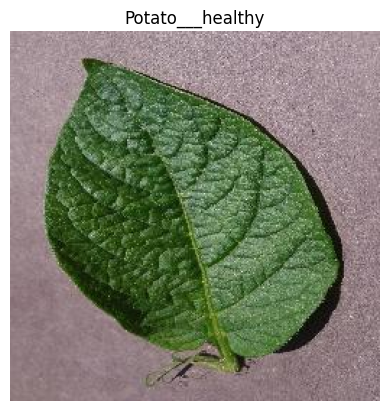

In [ ]:
# Visualizando aleatoriamente algumas imagens de um diretório do dataset

def view_random_image(target_dir, target_class):
  # Configurações
  target_folder = target_dir + target_class

  # Pegando um caminho aleatório de image
  random_image = random.sample(os.listdir(target_folder), 1)

  # Lendo a imagem e exibindo-a
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

img = view_random_image("Plant_leave_diseases_dataset_with_augmentation/", "Potato___healthy")

## ❗Preparação pré-modelos

**Execução obrigatória!** Nesta seção se encontram códigos e funções que serão reaproveitados ao longo dos testes nos modelos, simplificando posteriormente algumas etapas dos experimentos.

In [ ]:
# Lista de classes de interesse de estudo
study_classes = ["Potato___Early_blight", "Potato___healthy", "Potato___Late_blight"]

> 🔑 **Nota:** O dataset PlantVillage possui diversas imagens (um total de mais de 60.000) associadas as suas respectivas classes. Porém, para fins práticos, o escopo será reduzido, facilitando o treinamento dos modelos.



In [ ]:
# Excluindo as demais classes
for dirname in os.listdir(dataset_path):

  dirpath = os.path.join(dataset_path, dirname)

  if os.path.isdir(dirpath) and dirname not in study_classes:
    shutil.rmtree(dirpath)
    print(f"Pasta {dirpath} removida!")

class_names = np.array(sorted([item.name for item in dataset_path.glob('*')]))
print(f"\nClasses atuais: ", class_names)

Pasta Plant_leave_diseases_dataset_with_augmentation/Soybean___healthy removida!
Pasta Plant_leave_diseases_dataset_with_augmentation/Grape___healthy removida!
Pasta Plant_leave_diseases_dataset_with_augmentation/Corn___Northern_Leaf_Blight removida!
Pasta Plant_leave_diseases_dataset_with_augmentation/Corn___healthy removida!
Pasta Plant_leave_diseases_dataset_with_augmentation/Grape___Leaf_blight_(Isariopsis_Leaf_Spot) removida!
Pasta Plant_leave_diseases_dataset_with_augmentation/Apple___Apple_scab removida!
Pasta Plant_leave_diseases_dataset_with_augmentation/Strawberry___Leaf_scorch removida!
Pasta Plant_leave_diseases_dataset_with_augmentation/Tomato___Spider_mites Two-spotted_spider_mite removida!
Pasta Plant_leave_diseases_dataset_with_augmentation/Apple___Black_rot removida!
Pasta Plant_leave_diseases_dataset_with_augmentation/Apple___Cedar_apple_rust removida!
Pasta Plant_leave_diseases_dataset_with_augmentation/Tomato___Leaf_Mold removida!
Pasta Plant_leave_diseases_dataset_

In [ ]:
# Preparando o dataset

img_size = (224, 224)
batch_size = 32

# Carregando dataset de treino (80% das imagens)
train_data = tf.keras.preprocessing.image_dataset_from_directory(dataset_path,
                                                                 validation_split=0.2,
                                                                 subset="training",
                                                                 seed=36,
                                                                 label_mode="categorical",
                                                                 image_size=img_size,
                                                                 batch_size=batch_size
                                                                 )

# Carregando dataset de validação (20% das imagens)
val_data = tf.keras.preprocessing.image_dataset_from_directory(dataset_path,
                                                               validation_split=0.2,
                                                               subset="validation",
                                                               seed=36,
                                                               label_mode="categorical",
                                                               image_size=img_size,
                                                               batch_size=batch_size
                                                               )

Found 3000 files belonging to 3 classes.
Using 2400 files for training.
Found 3000 files belonging to 3 classes.
Using 600 files for validation.


In [ ]:
# Camada de Normalização
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
# Aplicação de normalização
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
val_data = val_data.map(lambda x, y: (normalization_layer(x), y))

### Funções Essenciais

In [ ]:
# Função para importar uma imagem and redimensionar para ser usada no modelo
def load_and_prep_image(filename, img_shape=224):

  """
  Lê uma imagem através do filename, transforma em um tensor e redimensiona-o para
  (img_shape, image_shape, color_channels)
  """

  # Lê uma imagem
  img = tf.io.read_file(filename)

  # Decodificar o arquivo lido em um tensor
  img = tf.image.decode_image(img)

  # Redimensiona a imagem
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # Aplica normalização
  img = img/255.
  return img

In [ ]:
# Função para fazer uma previsão com um modelo e plotar a imagem
def pred_and_plot(model, filename, class_names):

  """
  Importa uma imagem através do filename, faz uma previsão com um modelo e plota
  a imagem com a classe prevista como título
  """

  #Importa a imagem e a preprocessa
  img = load_and_prep_image(filename)

  #Faz uma previsão
  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  #Plota a imagem e a classe prevista
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

### Funções de Visualização

In [ ]:
# Função para visualizar as regiões que mais contribuíram para a decisão do modelo
def make_gradcam_heatmap(img_array, model, pred_index=None):

    """
    Gera um mapa de calor Grad-CAM para uma imagem de entrada.
    """

    # Obtendo o nome da última camada convolucional do modelo base
    last_conv_layer_name = [layer.name for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)][-1]
    last_deep_layer = [layer.name for layer in model.layers if isinstance(layer, tf.keras.layers.Dense)][-1]

    # Criando um modelo auxiliar que mapeia a imagem de entrada até a saída da última
    # camada convolucional
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.get_layer(last_deep_layer).output]
    )

    # Gravamos as operações e calculamos o gradiante da classe principal prevista
    # em relação a última camada connvolucional
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Gradiente da classe escolhida em relação as saídas da última camada convolucional
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Calculamos a média dos gradientes para cada canal da camada convolucional,
    # obtendo um peso (quanto maior, mais importante para a classe prevista)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Pesamos cada saída da última camada convolucional usando os valores médios
    # dos gradientes, somando todos os canais e criando o heatmap
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalização do heatmap, para facilitar a visualização e sobreposição com a
    # imagem original
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
# Função para visualizar sobreposição do heatmap com a imagem original
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    """
    Salva e exibe o mapa de calor Grad-CAM sobre a imagem original.
    """

    # Carrega a imagem original
    img = mpimg.imread(img_path)
    img = img / 255.0 if img.max() > 1 else img  # Normaliza se necessário
    img_height, img_width = img.shape[:2]

    # Reajusta o heatmap para o intervalo 0-255
    heatmap = np.uint8(255 * heatmap)

    # Redimensiona o heatmap para o tamanho da imagem original
    heatmap = cv2.resize(heatmap, (img_width, img_height))

    # Aplica colormap "jet"
    jet = plt.cm.jet(heatmap)[..., :3]

    # Sobrepõe o mapa de calor à imagem
    superimposed_img = jet * alpha + img * (1 - alpha)
    superimposed_img = np.clip(superimposed_img, 0, 1)

    # Salva a imagem com o mapa de calor
    plt.imsave(cam_path, superimposed_img)

    # Exibe
    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()

In [ ]:
# Função para visualizar a imagem original juntamente com seu heatmap (OPCIONAL)
def visualize_heatmap(img, heatmap):

  """
  Visualiza a imagem original e o mapa de calor Grad-CAM lado a lado.
  """

  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

  # Exibe imagem original
  axes[0].imshow(img)
  axes[0].set_title("Imagem Original")
  axes[0].axis("off")

  # Exibe o heatmap
  axes[1].imshow(heatmap)
  axes[1].set_title("Mapa de Calor Grad-CAM")
  axes[1].axis(False)

  plt.tight_layout()
  plt.show()

### Funções de Métricas

In [ ]:
# Plota a curvas de validação e treinamento separadas
def plot_all_metrics(history):

  """
  Plota as curvas de validação e treinamento por época separadas para todas as métricas.
  """
  metrics = {"loss": "Perda", "accuracy": "Acurácia", "precision": "Precisão", "recall": "Recall"}

  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
  axes = axes.flatten()

  epochs = list(range(len(history.history["loss"])))

  for i, (metric, translated_metric) in enumerate(metrics.items()):
    train_key = metric
    val_key = f"val_{metric}"

    if train_key in history.history.keys() and val_key in history.history:
        df = pd.DataFrame({
            "Época": epochs,
            "Treinamento": history.history[train_key],
            "Validação": history.history[val_key]
        })
        df_long = df.melt(id_vars="Época", var_name="Tipo", value_name="Valor")

        sns.set_theme(style="darkgrid")
        sns.lineplot(data=df_long, x="Época", y="Valor", hue="Tipo", ax=axes[i], marker="o")
        axes[i].set_title(f"{translated_metric} por Época")
        axes[i].set_xlabel("Épocas")
        axes[i].set_ylabel(translated_metric)
        axes[i].legend(title="Conjunto")
        axes[i].grid(True)

  # Remove subplot vazio se num_metrics < número de subplots criados
  if len(metrics) < len(axes):
      for j in range(len(metrics), len(axes)):
          fig.delaxes(axes[j])

  plt.tight_layout()
  plt.suptitle("Desempenho do Modelo por Métrica", fontsize=16, y=1.02)
  plt.show()

In [ ]:
# Função que retorna métricas
def evaluate_model_metrics(model, val_data):

  """
  Avalia o modelo usando o conjunto de validação e retorna o valor final de acurácia, precisão,
  recall e F1-score. Plota a matriz de confusão.
  """

  y_true = []
  y_pred = []

  for images, labels in val_data:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    if preds.ndim > 1:
        y_pred.extend(np.argmax(preds, axis=1))
    else:
        y_pred.extend([np.argmax(preds)])

  # Cálculo das métricas
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
  recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
  f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

  # Exibe relatório
  print("Relatório de Classificação:\n")
  print(classification_report(y_true, y_pred, digits=4, zero_division=0))

  # Matriz de confusão
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(6, 5))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=class_names if len(class_names) > 0 else np.unique(y_true),
    yticklabels=class_names if len(class_names) > 0 else np.unique(y_true))
  plt.xlabel("Previsão")
  plt.ylabel("Real")
  plt.title("Matriz de Confusão")
  plt.show()

  return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
  }

## Modelo 1: Teste

In [ ]:
# Construindo o modelo
model_1 = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(32, 3, activation='relu'),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(2),
    Conv2D(32, 3, activation='relu'),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(2),
    Flatten(),
    Dense(3, activation='softmax'),
])

# Compilando o modelo
model_1.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy", "precision", "recall"]
)

In [ ]:
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 220, 220, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 218, 218, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 109, 109, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 107, 107, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 105, 105, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 52, 52, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │       259,587 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 297,475 (1.13 MB)

 Trainable params: 297,475 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Treinando o modelo
history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=val_data,
                        validation_steps=(len(val_data))
                        )

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 141ms/step - accuracy: 0.5273 - loss: 0.9866 - precision: 0.6258 - recall: 0.3295 - val_accuracy: 0.9083 - val_loss: 0.2122 - val_precision: 0.9129 - val_recall: 0.9083
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 137ms/step - accuracy: 0.8854 - loss: 0.2926 - precision: 0.8941 - recall: 0.8756 - val_accuracy: 0.9417 - val_loss: 0.1530 - val_precision: 0.9417 - val_recall: 0.9417
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - accuracy: 0.9566 - loss: 0.1184 - precision: 0.9569 - recall: 0.9561 - val_accuracy: 0.9117 - val_loss: 0.2122 - val_precision: 0.9132 - val_recall: 0.9117
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - accuracy: 0.9637 - loss: 0.1022 - precision: 0.9640 - recall: 0.9637 - val_accuracy: 0.8800 - val_loss: 0.3503 - val_precision: 0.8826 - val_recall: 0.8767
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - accuracy: 0.9656 - loss: 0.0826 - precision: 0.9678 - recall: 0.9648 - val_accuracy: 0.9283 - val_loss

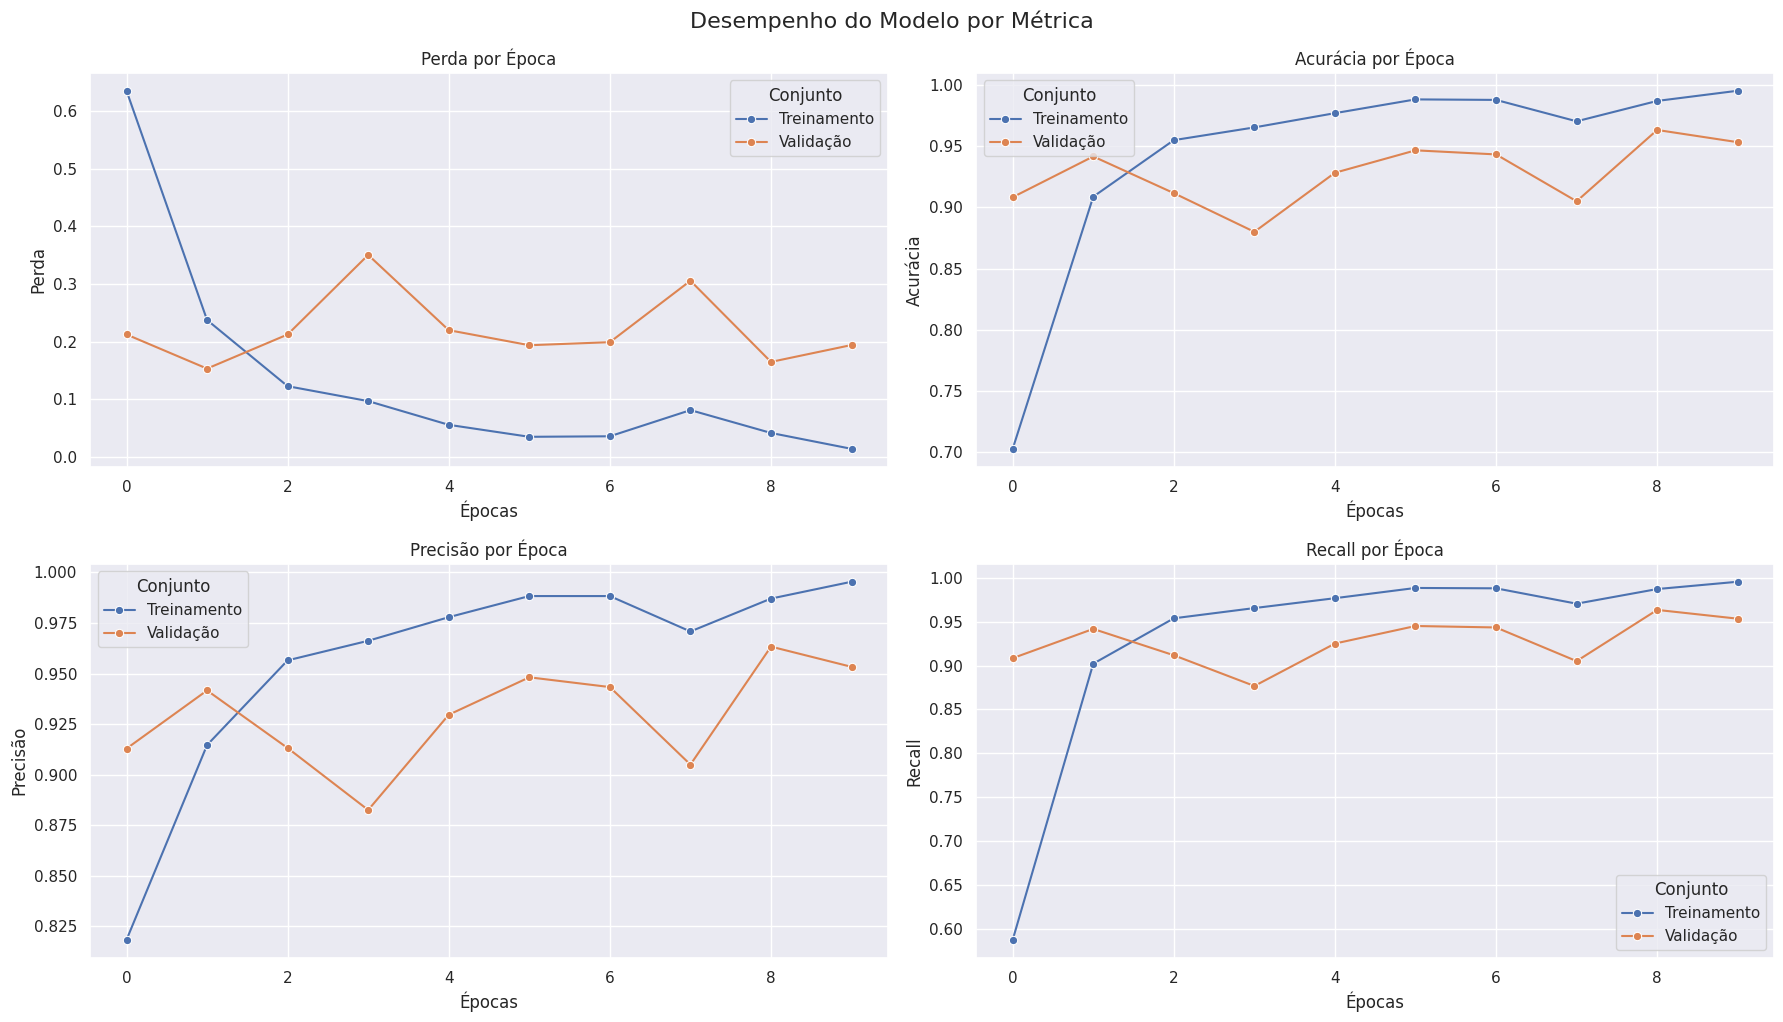

In [ ]:
plot_all_metrics(history_1)

### Usando uma imagem nova

(np.float64(-0.5), np.float64(849.5), np.float64(829.5), np.float64(-0.5))

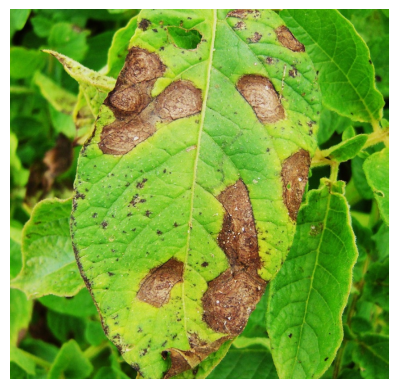

In [ ]:
# Através de link
# !wget https://agriq.com.br/wp-content/uploads/2023/06/Blog-AgriQ_Requeima-da-batata_Creditos-Vegetable-Growers-News.jpeg

img_path = "img.jpg"
new_img = mpimg.imread(img_path)
plt.imshow(new_img)
plt.axis("off")

In [ ]:
# Prepara a imagem para o modelo
new_img = load_and_prep_image(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


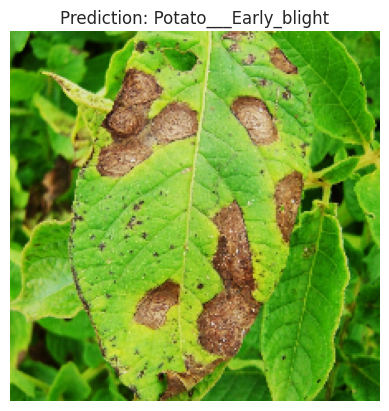

In [ ]:
# Faz a previsão da imagem
pred_and_plot(model_1, img_path, class_names)

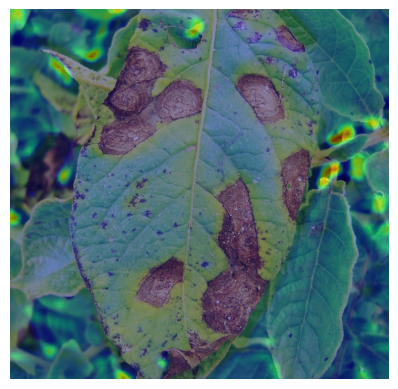

In [ ]:
img_array = tf.expand_dims(load_and_prep_image(img_path), axis=0)

heatmap = make_gradcam_heatmap(img_array, model_1)
save_and_display_gradcam(img_path, heatmap)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


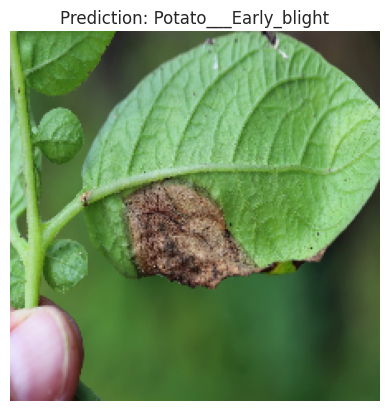

In [ ]:
img_path_2 = "img-2.jpg"
new_img_2 = mpimg.imread(img_path_2)
new_img_2 = load_and_prep_image(img_path_2)
pred_and_plot(model_1, img_path_2, class_names)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_20']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


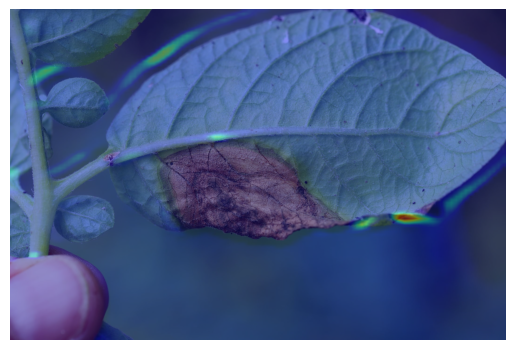

In [ ]:
img_array_2 = tf.expand_dims(load_and_prep_image(img_path_2), axis=0)

heatmap_2 = make_gradcam_heatmap(img_array_2, model_1)
save_and_display_gradcam(img_path_2, heatmap_2)

## Modelo 2: Adaptação do Inception-V3

Este modelo usa como baseline uma adaptação do Inception-V3, baseada na proposta de arquitetura de Toda e Okura.

> **How Convolutional Neural Networks Diagnose Plant Disease (TODA; OKURA, 2019)**
Paper original: https://spj.science.org/doi/full/10.34133/2019/9237136

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, BatchNormalization, Activation, Concatenate, GaussianNoise
from tensorflow.keras.models import Model

# Bloco auxiliar: conv + BN + ReLU
def conv_bn(x, filters, kernel_size, strides=1, padding='same', name=None):
    x = Conv2D(filters, kernel_size, strides=strides, padding=padding, use_bias=False, name=f"{name}_conv")(x)
    x = BatchNormalization(name=f"{name}_bn")(x)
    x = Activation('relu', name=f"{name}_act")(x)
    return x

# Bloco Inception V3 customizado com fatoração
def inception_v3_style_block(x, f1, f3r, f3, f5r, f5, proj, name_prefix="incept"):
    # 1x1 conv
    path1 = conv_bn(x, f1, (1, 1), name=f"{name_prefix}_1x1")

    # 1x1 -> 1x3 -> 3x1
    path2 = conv_bn(x, f3r, (1, 1), name=f"{name_prefix}_3x3_reduce")
    path2 = conv_bn(path2, f3, (1, 3), name=f"{name_prefix}_3x3_a")
    path2 = conv_bn(path2, f3, (3, 1), name=f"{name_prefix}_3x3_b")

    # 1x1 -> 3x3 -> 3x3 (fatoração de 5x5)
    path3 = conv_bn(x, f5r, (1, 1), name=f"{name_prefix}_5x5_reduce")
    path3 = conv_bn(path3, f5, (3, 3), name=f"{name_prefix}_5x5_a")
    path3 = conv_bn(path3, f5, (3, 3), name=f"{name_prefix}_5x5_b")

    # 3x3 maxpool -> 1x1
    path4 = MaxPooling2D(pool_size=(3, 3), strides=1, padding='same', name=f"{name_prefix}_pool")(x)
    path4 = conv_bn(path4, proj, (1, 1), name=f"{name_prefix}_pool_proj")

    return Concatenate(axis=-1, name=f"{name_prefix}_concat")([path1, path2, path3, path4])

# Entrada
input_layer = Input(shape=(224, 224, 3), name="input")
x = GaussianNoise(0.1)(input_layer)

# Bloco inicial (como no diagrama)
x = conv_bn(x, 32, (3, 3), strides=2, padding='valid', name="conv1")   # 111x111
x = conv_bn(x, 32, (3, 3), padding='valid', name="conv2")             # 109x109
x = conv_bn(x, 64, (3, 3), padding='same', name="conv3")              # 109x109
x = MaxPooling2D(pool_size=(2, 2), strides=2, name="maxpool1")(x)     # 54x54

x = conv_bn(x, 80, (1, 1), padding='same', name="conv4")              # 54x54
x = conv_bn(x, 192, (3, 3), padding='valid', name="conv5")            # 52x52
x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='valid', name="maxpool2")(x)  # 25x25

# Blocos Inception customizados x6
for i in range(6):
    x = inception_v3_style_block(
        x,
        f1=128, f3r=128, f3=128,
        f5r=128, f5=128,
        proj=32,
        name_prefix=f"incept_{i}"
    )

# Finalização
x = GlobalAveragePooling2D(name="global_avg_pool")(x)
output_layer = Dense(3, activation='softmax', name="output")(x)

# Modelo
model_2 = Model(inputs=input_layer, outputs=output_layer)
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'precision', 'recall'])


In [ ]:
model_2.summary()

Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)  │ (None, 224, 224,  │          0 │ -                 │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gaussian_noise_3    │ (None, 224, 224,  │          0 │ input[0][0]       │
│ (GaussianNoise)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 111, 111,  │        864 │ gaussian_noise_3… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 111, 111,  │        128 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_act           │ (None, 111, 111,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_conv (Conv2D) │ (None, 109, 109,  │      9,216 │ conv1_act[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_bn            │ (None, 109, 109,  │        128 │ conv2_conv[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_act           │ (None, 109, 109,  │          0 │ conv2_bn[0][0]    │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3_conv (Conv2D) │ (None, 109, 109,  │     18,432 │ conv2_act[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3_bn            │ (None, 109, 109,  │        256 │ conv3_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3_act           │ (None, 109, 109,  │          0 │ conv3_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1            │ (None, 54, 54,    │          0 │ conv3_act[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv4_conv (Conv2D) │ (None, 54, 54,    │      5,120 │ maxpool1[0][0]    │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv4_bn            │ (None, 54, 54,    │        320 │ conv4_conv[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv4_act           │ (None, 54, 54,    │          0 │ conv4_bn[0][0]    │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv5_conv (Conv2D) │ (None, 52, 52,    │    138,240 │ conv4_act[0][0]   │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv5_bn            │ (None, 52, 52,    │        768 │ conv5_conv[0][0]

 Total params: 3,501,443 (13.36 MB)

 Trainable params: 3,489,507 (13.31 MB)

 Non-trainable params: 11,936 (46.62 KB)

In [ ]:
history_2 = model_2.fit(train_data, epochs=10, steps_per_epoch=len(train_data), validation_data=val_data, validation_steps=(len(val_data)))

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 68s 308ms/step - accuracy: 0.8322 - loss: 0.3981 - precision: 0.8490 - recall: 0.7960 - val_accuracy: 0.3383 - val_loss: 5.2721 - val_precision: 0.3383 - val_recall: 0.3383
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 222ms/step - accuracy: 0.9346 - loss: 0.1843 - precision: 0.9413 - recall: 0.9295 - val_accuracy: 0.3383 - val_loss: 9.6271 - val_precision: 0.3383 - val_recall: 0.3383
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 217ms/step - accuracy: 0.9438 - loss: 0.1471 - precision: 0.9493 - recall: 0.9433 - val_accuracy: 0.5883 - val_loss: 5.3107 - val_precision: 0.5883 - val_recall: 0.5883
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 222ms/step - accuracy: 0.9632 - loss: 0.0956 - precision: 0.9643 - recall: 0.9625 - val_accuracy: 0.3883 - val_loss: 3.5747 - val_precision: 0.3976 - val_recall: 0.3850
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 225ms/step - accuracy: 0.9401 - loss: 0.1430 - precision: 0.9437 - recall: 0.9372 - val_accuracy: 0.3500 - val_los

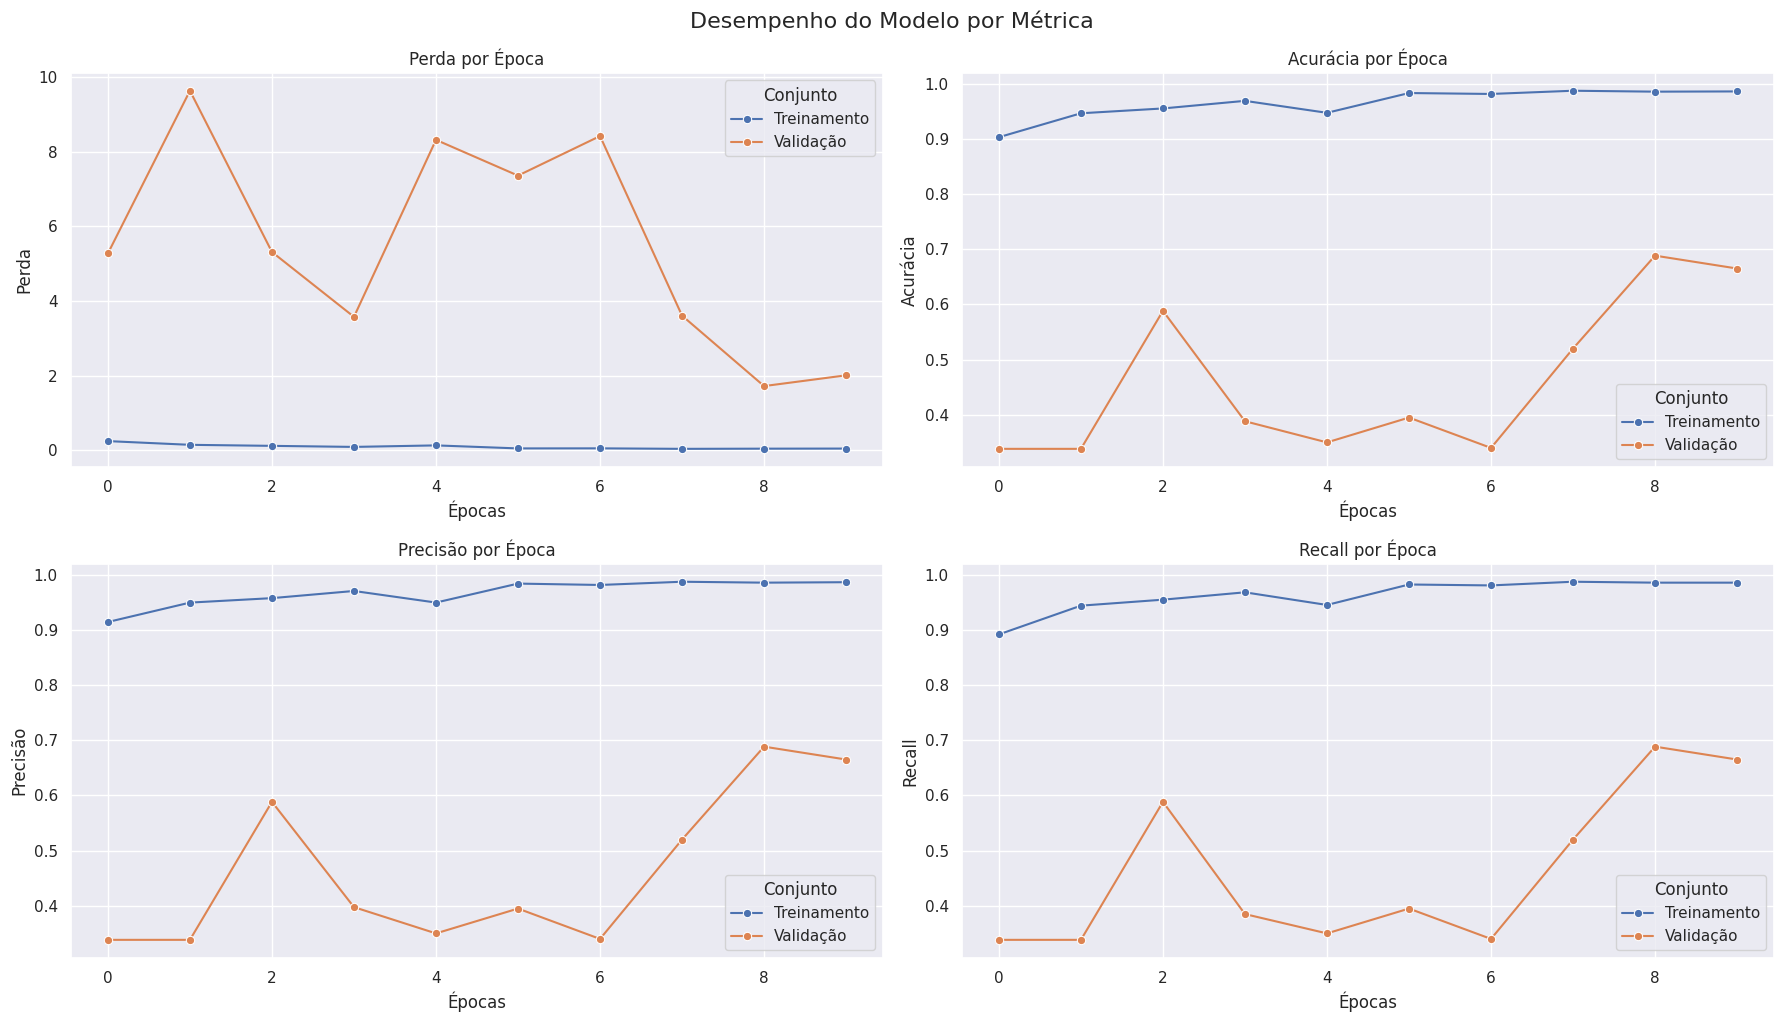

In [ ]:
plot_all_metrics(history_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


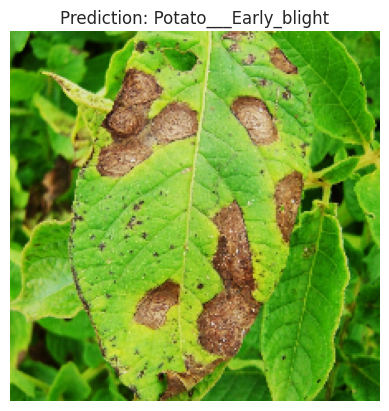

In [ ]:
img_path = "img.jpg"
new_img = mpimg.imread(img_path)
new_img = load_and_prep_image(img_path)
pred_and_plot(model_2, img_path, class_names)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


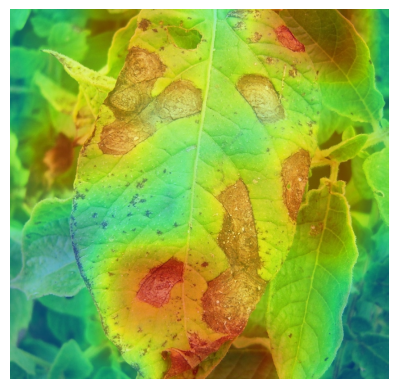

In [ ]:
img_array = tf.expand_dims(load_and_prep_image(img_path), axis=0)

heatmap = make_gradcam_heatmap(img_array, model_2)
save_and_display_gradcam(img_path, heatmap)